In [9]:
#1_Basics of Probability
import random

# Part a: Tossing a coin 10,000 times
def simulate_coin_tosses(trials=10000):
    heads = 0
    tails = 0

    for _ in range(trials):
        toss = random.choice(['H', 'T'])  # H for Heads, T for Tails
        if toss == 'H':
            heads += 1
        else:
            tails += 1

    prob_heads = heads / trials
    prob_tails = tails / trials

    print("Coin Toss Simulation (10,000 tosses):")
    print(f"Heads: {heads} ({prob_heads:.4f})")
    print(f"Tails: {tails} ({prob_tails:.4f})")
    print()

# Part b: Rolling two dice and computing probability of sum = 7
def simulate_dice_rolls(trials=10000):
    sum_7 = 0

    for _ in range(trials):
        die1 = random.randint(1, 6)
        die2 = random.randint(1, 6)
        if die1 + die2 == 7:
            sum_7 += 1

    prob_sum_7 = sum_7 / trials

    print("Dice Roll Simulation (10,000 rolls):")
    print(f"Number of times sum=7: {sum_7}")
    print(f"Experimental Probability of sum=7: {prob_sum_7:.4f}")

In [5]:
simulate_coin_tosses()

Coin Toss Simulation (10,000 tosses):
Heads: 4982 (0.4982)
Tails: 5018 (0.5018)



In [7]:
simulate_dice_rolls()

Dice Roll Simulation (10,000 rolls):
Number of times sum=7: 1718
Experimental Probability of sum=7: 0.1718


In [11]:
import random

def estimate_prob_one_six(trials=10000):
    success_count = 0

    for _ in range(trials):
        has_six = False
        for _ in range(10):  # 10 rolls per trial
            if random.randint(1, 6) == 6:
                has_six = True
                break  # No need to roll further once we get a 6
        if has_six:
            success_count += 1

    probability = success_count / trials
    print(f"Estimated Probability of getting at least one '6' in 10 rolls: {probability:.4f}")
    return probability

In [13]:
estimate_prob_one_six()

Estimated Probability of getting at least one '6' in 10 rolls: 0.8440


0.844

In [22]:
#2_Conditional Probability and Bayes' Theorem
import random

def simulate_ball_draws(trials=1000):
    # Bag contains: 5 red, 7 green, 8 blue balls
    bag = ['R'] * 5 + ['G'] * 7 + ['B'] * 8

    # Tracking pairs: (previous, current)
    transitions = []

    # First draw (no previous ball to compare with)
    prev = random.choice(bag)

    for _ in range(trials - 1):
        current = random.choice(bag)
        transitions.append((prev, current))
        prev = current

    # Count conditional occurrences
    count_prev_blue = 0
    count_prev_blue_and_current_red = 0

    for prev, current in transitions:
        if prev == 'B':
            count_prev_blue += 1
            if current == 'R':
                count_prev_blue_and_current_red += 1

    # Estimate P(Red | Previous was Blue)
    if count_prev_blue > 0:
        cond_prob = count_prev_blue_and_current_red / count_prev_blue
    else:
        cond_prob = 0

    print(f"Estimated P(Red | Previous was Blue): {cond_prob:.4f}")

    # Verify Bayes' Theorem (optional: use simulation frequencies)
    # P(R|B) = [P(B|R) * P(R)] / P(B)

    # Count total R, G, B
    total_counts = {'R': 0, 'G': 0, 'B': 0}
    for _, current in transitions:
        total_counts[current] += 1

    P_R = total_counts['R'] / len(transitions)
    P_B = total_counts['B'] / len(transitions)

    # Count how many times B follows R
    count_R = 0
    count_B_after_R = 0
    for prev, current in transitions:
        if prev == 'R':
            count_R += 1
            if current == 'B':
                count_B_after_R += 1

    P_B_given_R = count_B_after_R / count_R if count_R > 0 else 0

    # Bayes' theorem
    bayes_R_given_B = (P_B_given_R * P_R) / P_B if P_B > 0 else 0

    print(f"Bayes' Theorem Estimate P(R|B): {bayes_R_given_B:.4f}")

In [24]:
# Run the simulation
simulate_ball_draws()

Estimated P(Red | Previous was Blue): 0.2500
Bayes' Theorem Estimate P(R|B): 0.2836


In [26]:
#3_Random Variables and Discrete Probability
import numpy as np

# Define values and their probabilities
values = [1, 2, 3]
probabilities = [0.25, 0.35, 0.40]

# Step a: Generate sample of size 1000
sample = np.random.choice(values, size=1000, p=probabilities)

# Step b: Compute statistics
mean = np.mean(sample)
variance = np.var(sample)
std_dev = np.std(sample)

# Print results
print("Sample Statistics for Discrete Random Variable:")
print(f"Empirical Mean: {mean:.4f}")
print(f"Empirical Variance: {variance:.4f}")
print(f"Empirical Standard Deviation: {std_dev:.4f}")

Sample Statistics for Discrete Random Variable:
Empirical Mean: 2.1570
Empirical Variance: 0.6104
Empirical Standard Deviation: 0.7812


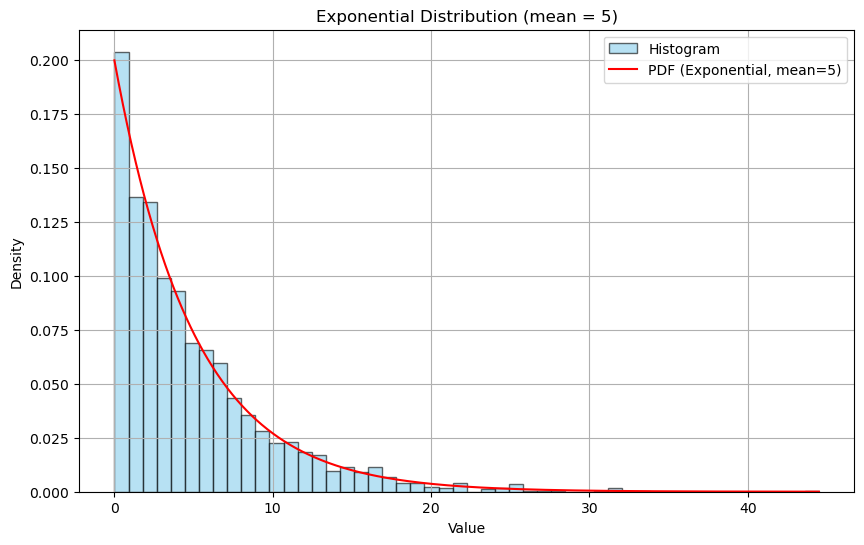

In [28]:
#4_Continuous Random Variables
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Parameters
mean = 5
scale = mean  # For exponential, mean = 1/λ = scale
size = 2000

# Step a: Generate samples
samples = np.random.exponential(scale=scale, size=size)

# Step b: Plot histogram with PDF overlay
plt.figure(figsize=(10, 6))

# Histogram
count, bins, _ = plt.hist(samples, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Histogram')

# PDF overlay using scipy's expon
x = np.linspace(0, np.max(samples), 1000)
pdf = expon.pdf(x, scale=scale)  # PDF of exponential distribution
plt.plot(x, pdf, 'r-', label='PDF (Exponential, mean=5)')

# Labels and title
plt.title('Exponential Distribution (mean = 5)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


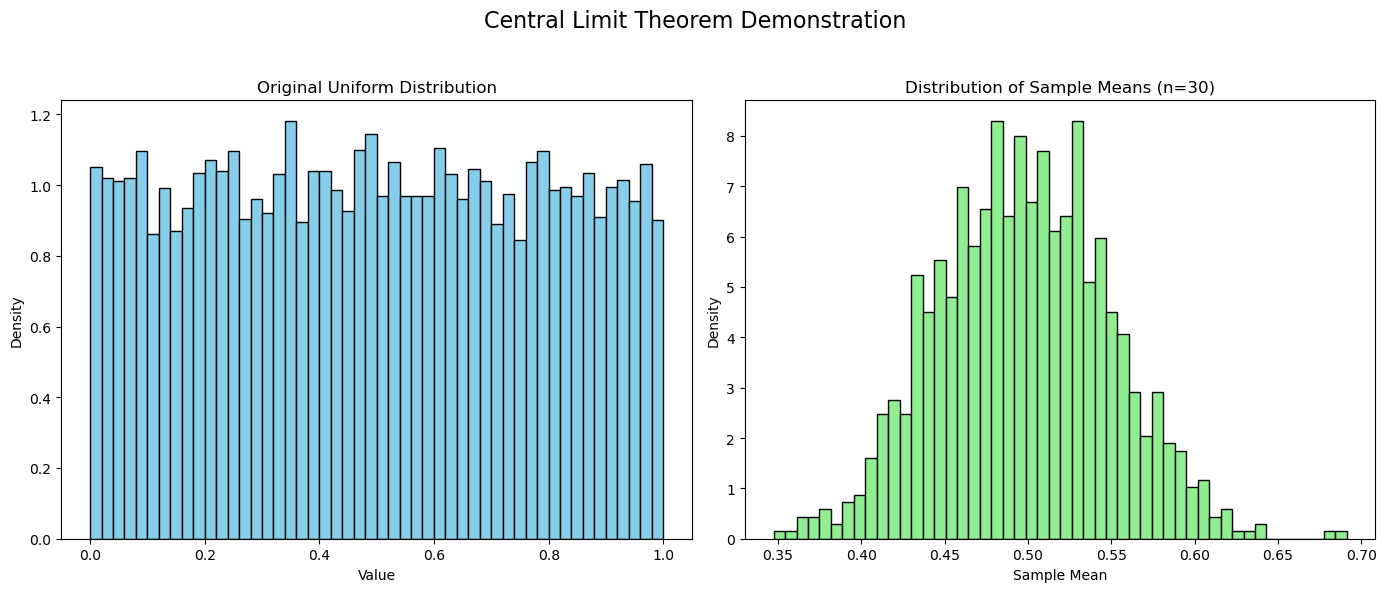

In [30]:
#5_Central Limit Theorem
import numpy as np
import matplotlib.pyplot as plt

# Step a: Generate 10,000 numbers from a uniform distribution
uniform_data = np.random.uniform(low=0, high=1, size=10000)

# Step b: Draw 1000 samples of size n=30 and compute sample means
sample_means = []

for _ in range(1000):
    sample = np.random.choice(uniform_data, size=30, replace=False)
    sample_means.append(np.mean(sample))

# Step c: Plot both distributions
plt.figure(figsize=(14, 6))

# Subplot 1: Original uniform distribution
plt.subplot(1, 2, 1)
plt.hist(uniform_data, bins=50, density=True, color='skyblue', edgecolor='black')
plt.title('Original Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

# Subplot 2: Distribution of sample means
plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=50, density=True, color='lightgreen', edgecolor='black')
plt.title('Distribution of Sample Means (n=30)')
plt.xlabel('Sample Mean')
plt.ylabel('Density')

plt.suptitle('Central Limit Theorem Demonstration', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()